In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
from urllib.request import urlopen
from datetime import datetime
from bs4 import BeautifulSoup
import squarify
import scipy.stats
import re

country = input('country : ')
city = input('City : ')
url = f"https://www.timeanddate.com/weather/{country}/{city}/ext"
page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')
text = soup.get_text()
# print(soup.prettify())
day_str = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
drum = soup.find_all('table', {'class': 'zebra tb-wt fw va-m tb-hover'}, id='wt-ext')
store = []
data = []
data1 = []
# print(drum)
for i in drum:
    children = i.findChildren('td', recursive=True)
    # children1 = i.findChildren('td', {'class': 'small'}, recursive=True)

    for j in children:
        child = j.text
        # print(child)
        if child.isalnum():  # isalnum()
            data.append(child)
        else:
            data1.append(child)

# print(data1)
tem_f = []
exc = []
tem_fm = []
for i in data1:
    if len(i) >= 6 or i == '' or i == '-' or i == '↑':
        tem_f.append(i)
    else:
        exc.append(i)

for y in data1:
    if len(y) >= 6 and y[-1] == 'h':
        tem_fm.append(y)

# print(tem_f)
# print(exc)
# print(tem_fm)

clean = []
destroy = []
for j in exc:
    if j[0].isalpha():
        destroy.append(j)
    else:
        clean.append(j)

# print(clean)
# print(destroy)

Humidity = []
wind = []
high_low = []
for k in clean:
    if len(k) <= 3:
        Humidity.append(k)

# print(Humidity)
# print(high_low)

temp = []
for h in tem_f:
    if len(h) > 7 and h[-1] == 'C':
        temp.append(h)

# print(temp)

# c = Humidity[::2]

# print(c)

string = []
for i in temp:
    s = i.split()
    string.append(s)

# print(string)

temp_h = []
for i in string:
    a = i[0]
    temp_h.append(a)

# print(temp_h)

low_t = []
for i in string:
    l = i[2]
    low_t.append(l)

a = len(day_str)
avg_temp = []
for o in range(0, a):
    if int(temp_h[o])!=0 and int(low_t[o])!=0:
        A = (int(temp_h[o]) + int(low_t[o])) / 2
        avg_temp.append(round(A))
        o += 1
    else:
        a = int(temp_h[o])+int(low_t[o])
        avg_temp.append(a)

# print(avg_temp)
humidity = []
for t in Humidity:
    d = int(re.search(r'\d+', t).group())
    humidity.append(d)

# print(humidity)
c = humidity[::2]
# print(low_t)
#
for e in tem_fm:
    b = e.split()
    s = b[0]
    wind.append(s)

# print(wind)
#
field = ['Day', 'High Temp', 'Low Temp', 'Humidity', 'WindSpeed', "Avg Temp"]
b = len(day_str)
i = 0
for i in range(0, b):
    a = {"Day": f"{day_str[i]}", "High Temp": f"{temp_h[i]}", "Low Temp": f"{low_t[i]}",
         "Humidity": f"{c[i]}", "WindSpeed": f"{wind[i]}", "Avg Temp": f"{avg_temp[i]}"}
    store.append(a)
    i += 1


# print(store)

with open('sample.csv', 'w') as sam:
    writer = csv.DictWriter(sam, fieldnames=field)
    writer.writeheader()
    writer.writerows(store)



country : India
City : dhule


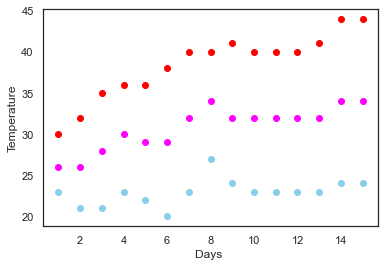

In [27]:
df = pd.read_csv("sample.csv")
u = df["Avg Temp"]
v = df["Day"]
w = df["High Temp"]
x = df['Low Temp']
y = df['Humidity']
z = df['WindSpeed']
plt.xlabel('Days ')
plt.ylabel('Temperature')
plt.scatter(v, w, color='red')
plt.scatter(v, x, color='skyblue')
plt.scatter(v, u, color='magenta')
plt.show()


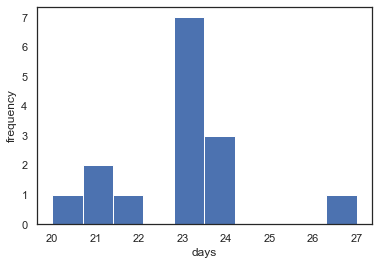

In [28]:
plt.hist(x )
plt.xlabel('days')
plt.ylabel('frequency')
plt.show()

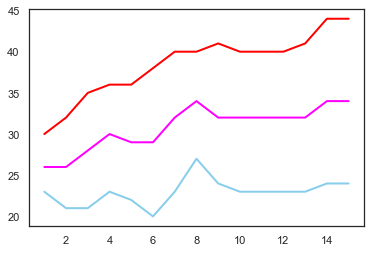

In [29]:
plt.plot(v, w, color='red', linewidth=2.0)
plt.plot(v, x, color='skyblue', linewidth=2.0)
plt.plot(v, u, color='magenta', linewidth=2.0)

plt.show()

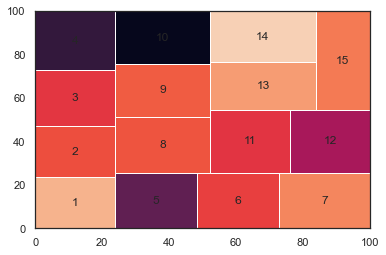

In [30]:
squarify.plot(u, label=day_str)
plt.show()

In [31]:
df.columns

Index(['Day', 'High Temp', 'Low Temp', 'Humidity', 'WindSpeed', 'Avg Temp'], dtype='object')

In [32]:
df.head()

,Day,High Temp,Low Temp,Humidity,WindSpeed,Avg Temp
0,1,30,23,38,14,26
1,2,32,21,34,15,26
2,3,35,21,27,10,28
3,4,36,23,21,10,30
4,5,36,22,17,13,29


In [33]:
df.tail()

,Day,High Temp,Low Temp,Humidity,WindSpeed,Avg Temp
10,11,40,23,7,20,32
11,12,40,23,7,24,32
12,13,41,23,8,22,32
13,14,44,24,11,14,34
14,15,44,24,7,25,34


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Avg Temp', ylabel='Humidity'>

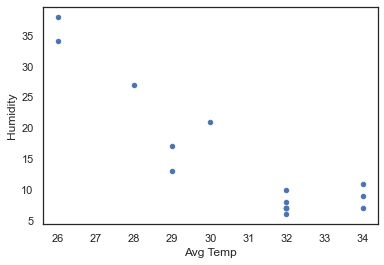

In [34]:
df.plot(x='Avg Temp', y='Humidity', kind="scatter")

<ipython-input-35-37145dccf9c2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(random_dists,rotation=45, fontsize=12)


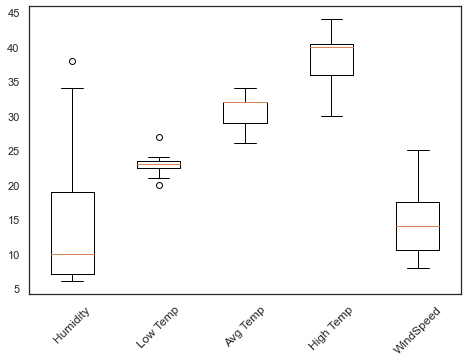

In [35]:

random_dists = ['Humidity', 'Low Temp', 'Avg Temp', 'High Temp',
                'WindSpeed']
data = [y, x, u, w, z]
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0.1, 0.1, 1, 1])
# Create the boxplot
ax.set_xticklabels(random_dists,rotation=45, fontsize=12)
bp = ax.boxplot(data)
plt.show()

In [36]:
from scipy.stats import pearsonr
list1 = df['High Temp']
list2 = df['Low Temp']
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.478


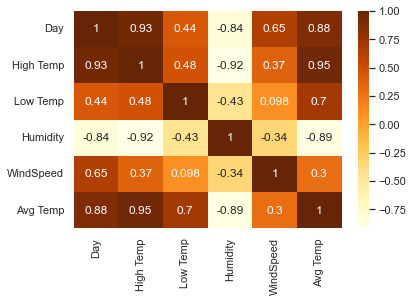

In [37]:
sns.heatmap(df.corr(),cmap="YlOrBr",annot=True);

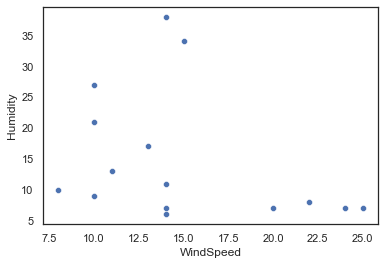

In [38]:
sns.set_theme(style="white")
sns.scatterplot(x="WindSpeed", y="Humidity",data=df);

<AxesSubplot:>

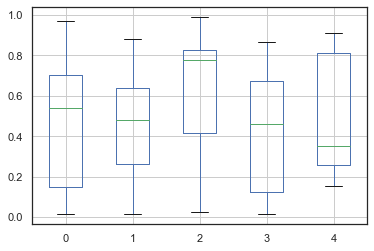

In [39]:
import numpy as np
df= pd.DataFrame(np.random.rand(10, 5))
df.plot.box(grid='True')